In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [2]:
## Usos horarios

In [3]:
def interpola(path, lat, lon):
    data = xr.open_dataset(path, chunks={'latitude':10, "longitude":10})
    data = data.interp(latitude=lat, longitude=lon)
    df = pd.DataFrame(data={"cf_wind":data.cf_wind.values, "cf_sol":data.cf_sol.values}, index=data.time)
    return df
    del df, data

In [4]:
def crea_df(path, lat, lon):
    df_total = []
    for file in path:
        print(file)
        df_total.append(interpola(file,lat,lon))
    df_total = pd.concat(df_total)
    df_total.sort_index(inplace=True)
    #print(df_total)
    df_total = df_total.groupby(by=[df_total.index.month, df_total.index.hour]).mean()
    #print(df_total)
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_total.cf_wind.values)
    ax.plot(df_total.cf_sol.values)
    ax.set_title(f"CF values at lat {lat} lon {lon}")
    return df_total

In [7]:
path = glob("../eolica-nas/2_simulaciones/CF_latam/cfs_sur_*")
path

['../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1980.nc',
 '../eolica-nas/2_simulaciones/CF_latam/cfs_sur_2010.nc',
 '../eolica-nas/2_simulaciones/CF_latam/cfs_sur_2000.nc',
 '../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1990.nc']

../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1980.nc
../eolica-nas/2_simulaciones/CF_latam/cfs_sur_2010.nc
../eolica-nas/2_simulaciones/CF_latam/cfs_sur_2000.nc
../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1990.nc
CPU times: user 2.08 s, sys: 19.6 s, total: 21.7 s
Wall time: 32.8 s


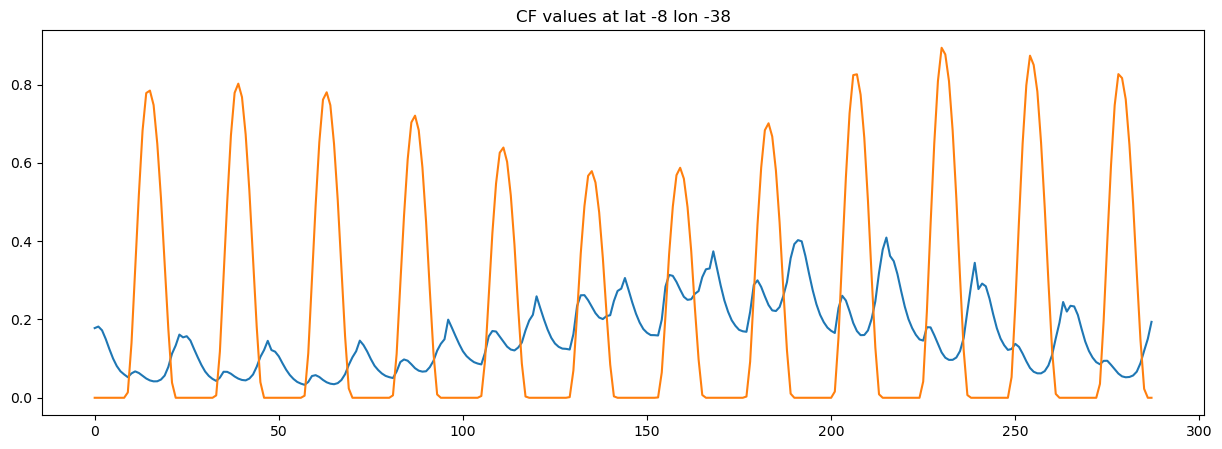

In [8]:
%%time
#brazil
crea_df(path, -8, -38)

In [ ]:
#chile
crea_df(path, -38, -72)

../eolica-nas/2_simulaciones/CF_latam/cfs_sur_1980.nc


In [ ]:
#chile
crea_df(path, -, -72)

### Mexico

In [5]:
path = glob("../eolica-nas/2_simulaciones/CF_latam/cfs_mx_*.nc")

In [6]:
#merida
crea_df(path, lat=20, lon=-89)

../eolica-nas/2_simulaciones/CF_latam/cfs_mx_1980.nc



KeyboardInterrupt

